Open the images, crop and visualize them

# Libraries

In [4]:
import os
import tarfile
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [58]:
# print the name of current environment
print(os.environ['CONDA_DEFAULT_ENV'])

svalbard


## Paths

read the paths of the images

and define list of images


In [59]:
os.chdir('/mnt/d/Dropbox/R_projects/VSLAIM/code')
print("La directory corrente è:", os.getcwd())


La directory corrente è: /mnt/d/Dropbox/R_projects/VSLAIM/code


In [60]:
os.chdir('../')

path = os.path.join('data', 'mypaths.csv')  # Combina cartella e nome file
df = pd.read_csv(path, sep=';')  # Leggi il file CSV


In [61]:
mypath = df.path[(df['var'] == 'landsat_data') & (df['year'] == 2017)]


In [62]:
# as string
mypath = mypath.values[0]

In [42]:
# remove the first 2 characters
mypath = mypath[2:]

In [47]:
mypath = "/mnt/e" + mypath + "/"


In [48]:
os.listdir(mypath)

['LC08_L2SP_191029_20170620_20200903_02_T1.tar',
 'LC08_L2SP_191029_20170722_20200903_02_T1.tar',
 'LC08_L2SP_191029_20170823_20200903_02_T1.tar',
 'LC08_L2SP_191029_20170908_20200903_02_T1.tar',
 'LC08_L2SP_191029_20171010_20200903_02_T1.tar',
 'LC08_L2SP_192028_20170830_20200903_02_T1.tar']

In [49]:
# Ottieni la lista di file TAR
tar_files = [f for f in os.listdir(mypath) if f.endswith('.tar')]


In [50]:
tar_files

['LC08_L2SP_191029_20170620_20200903_02_T1.tar',
 'LC08_L2SP_191029_20170722_20200903_02_T1.tar',
 'LC08_L2SP_191029_20170823_20200903_02_T1.tar',
 'LC08_L2SP_191029_20170908_20200903_02_T1.tar',
 'LC08_L2SP_191029_20171010_20200903_02_T1.tar',
 'LC08_L2SP_192028_20170830_20200903_02_T1.tar']

In [51]:
#new df with the tar files
df_tar = pd.DataFrame(tar_files, columns=['tar_files'])

In [56]:
# Estrazione degli archivi in sottocartelle
for tar_file in tar_files:
    # Costruisci il percorso completo del file TAR
    tar_path = os.path.join(mypath, tar_file)
    
    # Nome della sottocartella (senza estensione .tar)
    folder_name = tar_file.replace('.tar', '')
    extract_path = os.path.join(mypath, folder_name)
    
    # Se la cartella esiste già ed è non vuota, saltare l'estrazione
    if os.path.exists(extract_path) and os.listdir(extract_path):
        print(f"Cartella {extract_path} già esistente e non vuota. Salto l'estrazione.")
        continue  # Salta alla prossima iterazione

    # Crea la sottocartella se non esiste
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    
    # Estrai il contenuto del TAR nella sottocartella
    with tarfile.open(tar_path, 'r') as tar:
        tar.extractall(path=extract_path)
        print(f"Archivio {tar_file} estratto in {extract_path}")

Archivio LC08_L2SP_191029_20170620_20200903_02_T1.tar estratto in /mnt/e/Landsat/2017/LC08_L2SP_191029_20170620_20200903_02_T1
Archivio LC08_L2SP_191029_20170722_20200903_02_T1.tar estratto in /mnt/e/Landsat/2017/LC08_L2SP_191029_20170722_20200903_02_T1
Archivio LC08_L2SP_191029_20170823_20200903_02_T1.tar estratto in /mnt/e/Landsat/2017/LC08_L2SP_191029_20170823_20200903_02_T1
Archivio LC08_L2SP_191029_20170908_20200903_02_T1.tar estratto in /mnt/e/Landsat/2017/LC08_L2SP_191029_20170908_20200903_02_T1
Archivio LC08_L2SP_191029_20171010_20200903_02_T1.tar estratto in /mnt/e/Landsat/2017/LC08_L2SP_191029_20171010_20200903_02_T1
Archivio LC08_L2SP_192028_20170830_20200903_02_T1.tar estratto in /mnt/e/Landsat/2017/LC08_L2SP_192028_20170830_20200903_02_T1


1    D:/Dropbox/R_projects/shapeme/out/laguna_noval...
Name: path, dtype: object

In [71]:
"D:\Dropbox\R_projects\shapeme\out\laguna_novally_simple_wgs_manual.geojson"

'D:\\Dropbox\\R_projects\\shapeme\\out\\laguna_novally_simple_wgs_manual.geojson'

<Axes: >

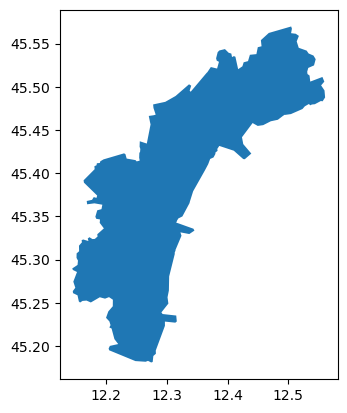

In [76]:
# area di interesse
# Carica lo shapefile
mypath = df.path[(df['var'] == 'shape_ve')]
shapefile = "/mnt/d" + mypath.values[0][2:] 
shapes = gpd.read_file(shapefile)
# map
shapes.plot()